In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy import constants as const
from astropy import units as u


In [2]:
def gamma(u1,u2,u3):
    g = np.sqrt(1 + u1**2 + u2**2 + u3**2)
    return g

In [3]:
def syn(state, t, B0):
    
    x  = state[0]
    ux = state[1]
    y  = state[2]
    uy = state[3]
    z  = state[4]
    uz = state[5]
    
    duxdt = uy/gamma(ux, uy, uz)
    duydt = -ux/gamma(ux, uy, uz)
    duzdt = 0.0
    
    dxdt = ux/gamma(ux,uy,uz)
    dydt = uy/gamma(ux,uy,uz)
    dzdt = uz/gamma(ux,uy,uz)
    
#     print(np.sqrt(x**2 + y*2), np.tan(y/x), z, gamma(ux, uy, uz))

    
    derivs = [dxdt, duxdt, dydt, duydt, dzdt, duzdt]
    
    return derivs

In [4]:
def syn_cyl(state_cyl, t, B0, A):
    
    r  = state_cyl[0]
    ur = state_cyl[1]
    phi  = state_cyl[2]
    uphi = state_cyl[3]
    z_cyl  = state_cyl[4]
    uz_cyl = state_cyl[5]
    
    
    
    durdt = uphi*B0/gamma(ur, uphi, uz_cyl) + uphi**2/(r*gamma(ur, uphi, uz_cyl))
    duphidt = -ur*B0/gamma(ur, uphi, uz_cyl) - ur*uphi/(r*gamma(ur, uphi, uz_cyl))
    duzdt = 0.0
    
    drdt = ur/gamma(ur,uphi,uz_cyl)
    dphidt = uphi/(r*gamma(ur,uphi,uz_cyl))
    dzdt = uz_cyl/gamma(ur,uphi,uz_cyl)
    
#     print(r, phi, z, gamma(ur, uphi, uz))
    
    derivs = [drdt, durdt, dphidt, duphidt, dzdt, duzdt]
    
    return derivs

In [5]:
A = const.e.gauss/const.m_e.cgs/const.c.cgs/(u.Fr*u.s)*(u.cm*u.g)

B0 = 1.0

E = 0.00

state0 = [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]

state0_cyl = [1.0, 0.0, 0.0, 1.0, 0.0, 1.0]

t = np.linspace(0.0, 100.0, 1000)

In [6]:
state = odeint(syn, state0, t, args = (B0, ))

state_cyl = odeint(syn_cyl, state0_cyl, t, args = (B0, A, ))

In [7]:
x  = state[:,0]
ux = state[:,1]
y  = state[:,2]
uy = state[:,3]
z  = state[:,4]
uz = state[:,5]

r  = state_cyl[:,0]
ur = state_cyl[:,1]
phi  = state_cyl[:,2]
uphi = state_cyl[:,3]
z_cyl  = state_cyl[:,4]
uz_cyl = state_cyl[:,5]

<IPython.core.display.Javascript object>


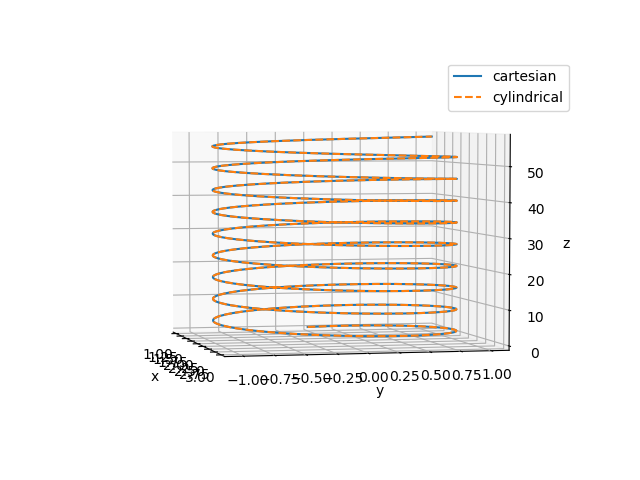

In [15]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label = 'cartesian')
ax.plot(r*np.cos(phi), r*np.sin(phi), z_cyl, '--', label = 'cylindrical')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=0, elev=90)
ax.legend()
plt.show()
# plt.savefig('syncrotron_correct')

<IPython.core.display.Javascript object>


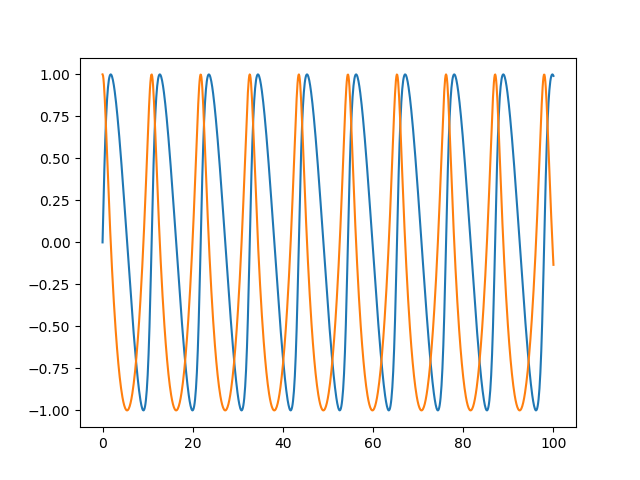

In [9]:
fig = plt.figure()
plt.plot(t, ur)
plt.plot(t, uphi)


<IPython.core.display.Javascript object>


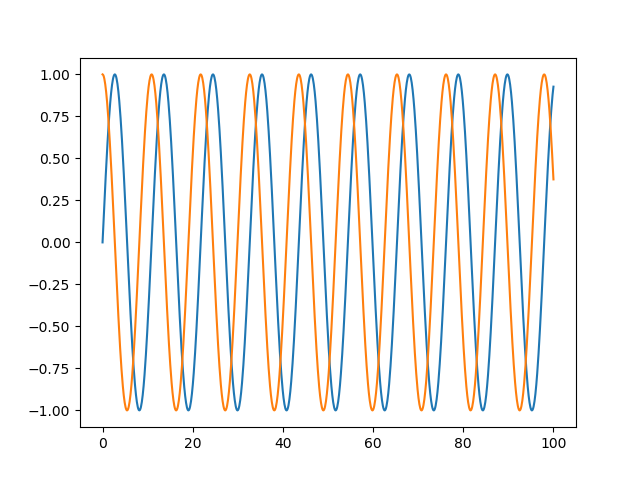

In [10]:
fig = plt.figure()
plt.plot(t, ux)
plt.plot(t, uy)

<IPython.core.display.Javascript object>


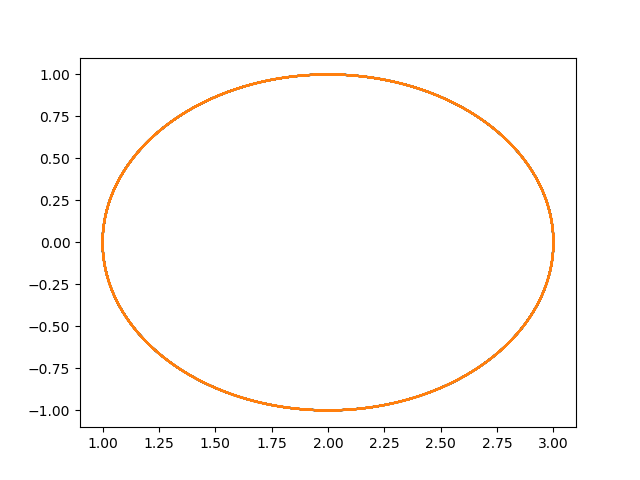

In [14]:
fig = plt.figure()
plt.plot(x, y)
plt.plot(r*np.cos(phi), r*np.sin(phi), '--')


<IPython.core.display.Javascript object>


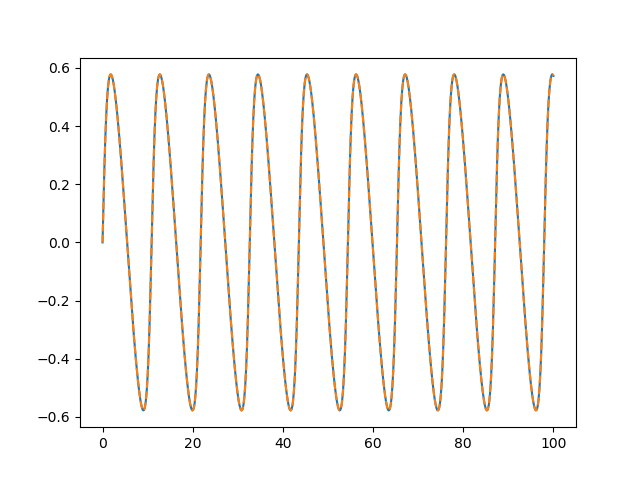

In [12]:
fig = plt.figure()
plt.plot(t, (x*ux/gamma(ux, uy, uz)+y*uy/gamma(ux, uy, uz))/np.sqrt(x**2 + y**2))
plt.plot(t, ur/gamma(ur, uphi, uz_cyl), '--')

<IPython.core.display.Javascript object>


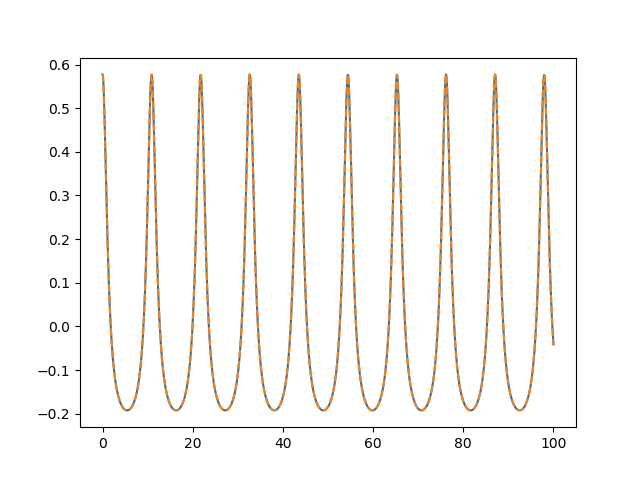

In [13]:
fig = plt.figure()
plt.plot(t, (uy/gamma(ux, uy, uz)*x - ux*y/gamma(ux, uy, uz))/(x**2 + y**2))
plt.plot(t, uphi/r/gamma(ur, uphi, uz_cyl), '--')